In [14]:
import matplotlib.pyplot as plt
import os
import numpy as np
import torch


class Ploter:
    def __init__(self, save_path=".", figsize=(5, 5), dpi=400, format="svg",
                 color_set=["#fb8500", "#023047", "#e56b6f",
                            "#219ebc", "#8e7dbe", '#ab3428',
                            '#49010f', '#bf209f', '#d62a9d',
                            '#ed317f', '#d64072', '#5603ad']):
        self.save_path = save_path
        if not os.path.exists(self.save_path):
            os.mkdir(self.save_path)
        self.figsize = figsize
        self.dpi = dpi
        self.format = format
        self.color = color_set

    def plot_hist(self, x, name, alpha=0.75, n_hist=50, is_save=True):
        plt.figure(facecolor="white", figsize=self.figsize)
        if isinstance(x, list):
            for cur_x in x:
                plt.hist(cur_x, n_hist, density=True, alpha=alpha)
        else:
            plt.hist(x, n_hist, density=True, alpha=alpha)
        # plt.xlabel('Smarts')
        # plt.ylabel('Probability')
        plt.title(name)
        # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
        # plt.xlim(40, 160)
        # plt.ylim(0, 0.03)
        plt.grid(True)
        if is_save:
            save_path = os.path.join(self.save_path, name) + "." + self.format
            plt.savefig(save_path, format=self.format, dpi=self.dpi)

    def plot_curves(self, data, smooth_num=10, xs_unit=1, legend=None, show_legend=True,
                    selected_curves=None, length=None, alpha=0.20, legendsize=20, labelsize=20, ticksize=20,
                    dotline=None,
                    grid=True, x_label=None, y_label=None, is_save=True, name="test"):

        m,v =self.smooth_data(data, smooth_num=smooth_num)
        if length is None:
            max_len = 0
            for im in range(len(m)):
                max_len = max(len(m[im]), max_len)
        else:
            max_len = length

        plt.figure(facecolor="white", figsize=self.figsize)
        xs = [i * xs_unit for i in range(max_len)]
        if grid:
            plt.grid(which='major', ls='-.')
        if legend is None:
            legend = []
            for i in range(len(m[0])):
                legend.append(i)

        m_dotline = []
        v_dotline = []
        if dotline is not None:
            for iline in dotline:
                m_dotline.append(np.array([iline[0] for _ in range(max_len)]))
                v_dotline.append(np.array([iline[1] for _ in range(max_len)]))

        if selected_curves is None:
            n_curves = len(m) + len(m_dotline)
            selected_curves = list(range(n_curves))
        else:
            n_curves = len(selected_curves)
        for j in range(len(selected_curves)):
            i = selected_curves[j]
            if i < len(m):
                if length is not None:
                    cur_length = min(len(m[i]), length)
                else:
                    cur_length = len(m[i])
                if self.color is not None:
                    plt.plot(xs[:cur_length], m[i][:cur_length], linewidth=2, color=self.color[j], label=legend[i])
                    plt.fill_between(xs[:cur_length], m[i][:cur_length] + v[i][:cur_length] / 2,
                                     m[i][:cur_length] - v[i][:cur_length] / 2, alpha=alpha, color=self.color[j])
                else:
                    plt.plot(xs[:cur_length], m[i][:cur_length], linewidth=2, label=legend[i])
                    plt.fill_between(xs[:cur_length], m[i][:cur_length] + v[i][:cur_length] / 2,
                                     m[i][:cur_length] - v[i][:cur_length] / 2, alpha=alpha)
            else:
                if length is not None:
                    cur_length = min(len(m_dotline[i - len(m)]), length)
                else:
                    cur_length = len(m_dotline[i - len(m)])
                if self.color is not None:
                    plt.plot(xs[:cur_length], m_dotline[i - len(m)][:cur_length], linewidth=2, color=self.color[j],
                             label=legend[i], linestyle='--')
                    plt.fill_between(xs[:cur_length],
                                     m_dotline[i - len(m)][:cur_length] + v_dotline[i - len(m)][:cur_length] / 2,
                                     m_dotline[i - len(m)][:cur_length] - v_dotline[i - len(m)][:cur_length] / 2,
                                     alpha=alpha, color=self.color[j])
                else:
                    plt.plot(xs[:cur_length], m_dotline[i - len(m)][:cur_length], linewidth=2, label=legend[i],
                             linestyle='--')
                    plt.fill_between(xs[:cur_length], m[i][:cur_length] + v_dotline[i - len(m)][:cur_length] / 2,
                                     m[i][:cur_length] - v_dotline[i - len(m)][:cur_length] / 2, alpha=alpha)
        if show_legend:
            plt.legend(fontsize=legendsize)

        font2 = {
            'weight': 'normal',
            'size': labelsize,
        }
        if x_label is not None:
            plt.xlabel(x_label, font2)
        if y_label is not None:
            plt.ylabel(y_label, font2)

        plt.tick_params(axis='both', which='major', labelsize=ticksize)
        # my_ticks = np.arange(0,1,4)
        # plt.xticks(my_ticks)
        # ax.xaxis.set_major_formatter(plt.FuncFormatter(xf))
        if is_save:
            save_path = os.path.join(self.save_path, name) + "." + self.format
            plt.savefig(save_path, format=self.format, dpi=self.dpi)

    def smooth_data(self, data, smooth_num=10):
        mean = []
        var = []
        if isinstance(data,list):
            for y in data:
                cur_data = [y[i: i + smooth_num] for i in range(int(len(y) - smooth_num))]
                cur_data = np.asarray(cur_data)
                mean.append(np.mean(cur_data, axis=1))
                var.append(np.std(cur_data, axis=1))
        else:
            cur_data = [data[i: i + smooth_num] for i in range(int(len(data) - smooth_num))]
            cur_data = np.asarray(cur_data)
            mean.append(np.mean(cur_data, axis=1))
            var.append(np.std(cur_data, axis=1))
            
        return mean, var

In [11]:
ploter=Ploter('test')

In [78]:
dir_path = '/home/pengjie/DifRL/libs/diffuser/logs/halfcheetah-medium-expert-v2/pc_diffusion/'
exp_name = 'test_am_a01_o1_H8_T20'
loss = torch.load(os.path.join(dir_path,exp_name,'loss.pt'))
loss_action = torch.load(os.path.join(dir_path,exp_name,'loss_action.pt'))

In [81]:
loss[:100]

array([0.45659626, 0.46183146, 0.46542785, 0.44980344, 0.44307791,
       0.44487946, 0.44255819, 0.41423184, 0.42334677, 0.4531119 ,
       0.4628558 , 0.43454215, 0.41567979, 0.4217351 , 0.42745651,
       0.40983115, 0.39893956, 0.4378041 , 0.39405346, 0.41128216,
       0.39852118, 0.40701125, 0.39886347, 0.40010091, 0.38940081,
       0.3852897 , 0.38769627, 0.39493878, 0.39524687, 0.4056363 ,
       0.39292292, 0.40958415, 0.42646101, 0.38578747, 0.37262369,
       0.39309176, 0.37047027, 0.40008574, 0.35827975, 0.3937261 ,
       0.45980951, 0.38084926, 0.38600787, 0.36471815, 0.41025009,
       0.374771  , 0.36156257, 0.38788474, 0.36351135, 0.36816019,
       0.38376188, 0.36708992, 0.37566491, 0.37352423, 0.35509436,
       0.38074305, 0.37862659, 0.35660602, 0.37433292, 0.34831461,
       0.34505795, 0.35025599, 0.37640546, 0.36216731, 0.37487287,
       0.35059864, 0.36090061, 0.3825121 , 0.35148847, 0.34566859,
       0.37608294, 0.3538071 , 0.33794534, 0.37571422, 0.38534

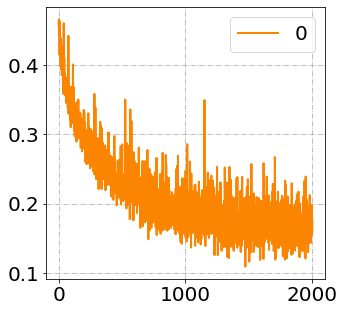

In [79]:
ploter.plot_curves(loss, smooth_num=1,length=3900)

In [82]:
dir_path = '/home/pengjie/DifRL/libs/diffuser/logs/halfcheetah-medium-expert-v2/pc_diffusion/'
exp_name = 'test2_am_a01_o1_H8_T20'
loss = torch.load(os.path.join(dir_path,exp_name,'loss.pt'))
loss_action = torch.load(os.path.join(dir_path,exp_name,'loss_action.pt'))

In [83]:
loss[:100]

array([0.11900474, 0.12429394, 0.08067271, 0.10673933, 0.1452972 ,
       0.10854169, 0.10025366, 0.09115375, 0.1386749 , 0.11164444,
       0.06669159, 0.09348545, 0.09852306, 0.10674885, 0.13572755,
       0.09883425, 0.10345465, 0.10408893, 0.10228108, 0.11434934,
       0.12103259, 0.10864491, 0.1163583 , 0.09608001, 0.12230495,
       0.11796753, 0.12369075, 0.08890245, 0.08127355, 0.09705426,
       0.06997144, 0.06178991, 0.11287842, 0.09071016, 0.08517129,
       0.15194115, 0.10260815, 0.1298765 , 0.1102171 , 0.11213364,
       0.11774142, 0.12348113, 0.10477519, 0.12905883, 0.14557258,
       0.09659419, 0.08251846, 0.11307959, 0.095553  , 0.11590013,
       0.10176953, 0.10833769, 0.13757899, 0.08641787, 0.13418559,
       0.09502313, 0.14646168, 0.10986187, 0.11456277, 0.13015254,
       0.09185742, 0.12378706, 0.12096427, 0.11910732, 0.08440911,
       0.12485314, 0.2063077 , 0.12992607, 0.11377653, 0.12597708,
       0.0984767 , 0.11624928, 0.12943025, 0.09756355, 0.13602

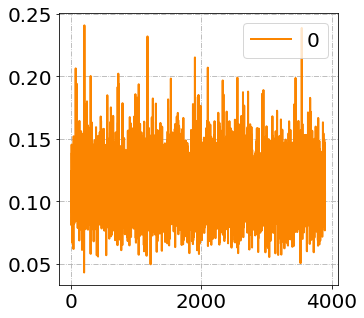

In [84]:
ploter.plot_curves(loss, smooth_num=1,length=3900)

In [ ]:
dir_path = '/home/pengjie/DifRL/libs/diffuser/logs/halfcheetah-medium-expert-v2/pc_diffusion/'
exp_name = 'lp_a01_o1_H8_T20'
loss = torch.load(os.path.join(dir_path,exp_name,'loss.pt'))
loss_action = torch.load(os.path.join(dir_path,exp_name,'loss_action.pt'))

In [4]:
import numpy as np

In [4]:
a = np.random.randn(100)
b = np.random.randn(100)

In [7]:
a.size

100

In [ ]:
def generate_data(y,smooth_num):
    
    data = [y[i: i+smooth_num] for i in range(int(len(y)-smooth_num))]
    data = np.asarray(data)
    mean = np.mean(data,axis=1)
    var = np.std(data,axis=1)
    return mean,var

In [10]:
y=a
smooth_num=10

In [11]:
a = [y[i: i+smooth_num] for i in range(int(len(y)-smooth_num))]

In [14]:
data = np.asarray(a)

In [16]:
mean = np.mean(data,axis=1)
var = np.std(data,axis=1)

In [17]:
mean

array([-0.13726337, -0.13923063, -0.10141894, -0.09798532, -0.44136405,
       -0.01547733,  0.0213287 ,  0.03403328,  0.08687979,  0.16478777,
        0.27545128,  0.17105966,  0.05248564,  0.10367782,  0.38272197,
        0.37359788,  0.18142439,  0.27150664,  0.12327781,  0.25947908,
        0.05348775,  0.10570327,  0.15862388, -0.07062079, -0.09195138,
       -0.35022342, -0.26790124, -0.41258264, -0.21027795, -0.26948053,
       -0.04759416, -0.21492486, -0.03441386,  0.23266154,  0.17275299,
        0.38350337,  0.56095207,  0.81329201,  0.70376452,  0.49169463,
        0.18563386,  0.30432086,  0.16261841,  0.02766435,  0.11709369,
        0.08248887,  0.01987629, -0.2140521 , -0.22279023, -0.25947174,
       -0.07489448, -0.11037691, -0.10619188, -0.11559294, -0.20678629,
       -0.17696592, -0.23193289, -0.11745884, -0.26830155, -0.04040962,
       -0.07776425, -0.30264329, -0.34300839, -0.14719904, -0.11188007,
       -0.17409136, -0.19195931, -0.19720224, -0.27662834, -0.39

In [2]:
ploter.plot_hist([a,b], 'test')

NameError: name 'ploter' is not defined

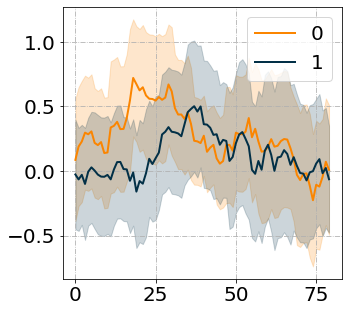

In [6]:
ploter=Ploter('test')
a = np.random.randn(100)
b = np.random.randn(100)
ploter.plot_curves([a,b],smooth_num=20, name='x')

In [9]:
a = [1]
b = np.random.randn(100)
np.append(a,b)

array([ 1.        ,  0.62638368,  0.41690366,  0.14654913,  0.53464436,
       -1.75981351, -1.05086317, -0.10709608, -1.44447169, -0.23850462,
        1.82799196, -0.90403182,  0.50044687, -0.02425464, -0.03951217,
       -0.35613111,  0.12478713,  0.03777723, -1.19084151,  0.62435102,
        0.85403903, -0.53999722, -1.32023814,  1.00713075,  0.64791606,
       -0.17873555, -0.09503449,  2.42952384, -0.7386388 ,  1.68032295,
       -1.42315622, -0.48542495, -0.39629019, -0.3263051 , -1.23218125,
        0.30645914, -0.43737797,  0.72558107, -0.11894165, -0.49565379,
       -1.03115862,  0.16558016,  0.77217673,  0.80175404,  1.61050961,
        0.17091108, -2.13105331,  0.04927293,  0.08280613,  2.40208509,
       -1.23970639,  1.046585  , -0.36765619, -0.94691355,  0.65435134,
       -1.82069523,  0.56080348, -1.20930875,  0.03805562, -0.47399368,
       -1.43060396,  0.83592249, -0.87854736,  1.19642912,  0.84841607,
        1.48265023,  0.10398821, -0.20100068,  0.08299209, -0.05